In [63]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from tsfresh.feature_extraction.feature_calculators import absolute_maximum

In [6]:
file_name = "train.h5"
f1 = h5py.File(file_name, 'r+')

In [65]:
custom_fc_parameters = {
    
        'absolute_maximum': None
    
}

X = []
Y = []
real_x = []
for i in range(len(f1['x'])):
    temp_row = []
    Y.append(f1['y'][i])
    for j in np.arange(0,5000,1000):
        temp_x = f1['x'][i][0][j: j+1000]
        #Process
        d = {'value': temp_x, 'id': [i] * len(temp_x)}
        df = pd.DataFrame(data=d)
        tf = extract_features(df, column_id='id', column_value='value', column_kind=None, default_fc_parameters=custom_fc_parameters)
        temp_row.append(tf.value__absolute_maximum)
    real_x.append(temp_row)
    


Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Extraction:   0%|          | 0/1 [00:02<?, ?it/s]


KeyboardInterrupt: 

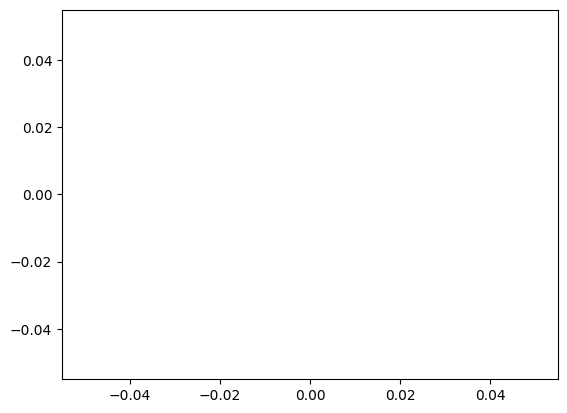

In [44]:
plt.plot(range(len(X[5][1000:2000])), X[5][1000:2000])

In [48]:
extract_features(df, column_id='id', column_value='value', column_kind=None, default_fc_parameters=MinimalFCParameters())

Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 16.17it/s]


,value__sum_values,value__median,value__mean,value__length,value__standard_deviation,value__variance,value__root_mean_square,value__maximum,value__absolute_maximum,value__minimum
0,-1.201172,-0.002258,-0.001201,1000.0,0.045834,0.002101,0.045849,0.167816,0.167816,-0.135284
1,1.275940,0.001541,0.001276,1000.0,0.040002,0.001600,0.040022,0.252808,0.252808,-0.148224
2,0.231598,0.001266,0.000232,1000.0,0.027517,0.000757,0.027518,0.150269,0.150269,-0.098419
3,0.224213,0.000015,0.000224,1000.0,0.015596,0.000243,0.015598,0.058746,0.068359,-0.068359
4,-0.247956,0.000015,-0.000248,1000.0,0.035449,0.001257,0.035450,0.135193,0.153046,-0.153046
...,...,...,...,...,...,...,...,...,...,...
199,-0.459015,0.000229,-0.000459,1000.0,0.022765,0.000518,0.022769,0.074860,0.074860,-0.071106
200,-0.368073,0.001022,-0.000368,1000.0,0.016832,0.000283,0.016836,0.040497,0.054871,-0.054871
201,0.948975,0.001404,0.000949,1000.0,0.029594,0.000876,0.029609,0.073059,0.107269,-0.107269
202,-0.109375,-0.000122,-0.000109,1000.0,0.011356,0.000129,0.011356,0.030609,0.036499,-0.036499


Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 17.70it/s]


0      0.167816
1      0.252808
2      0.150269
3      0.068359
4      0.153046
         ...   
199    0.074860
200    0.054871
201    0.107269
202    0.036499
203    0.541260
Name: value__absolute_maximum, Length: 204, dtype: float64

In [16]:
print(Y[:25])

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [9]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
machine = sklearn.svm.SVC()
machine.fit(X_train, Y_train)

SVC()

142 18530
142


<Axes: >

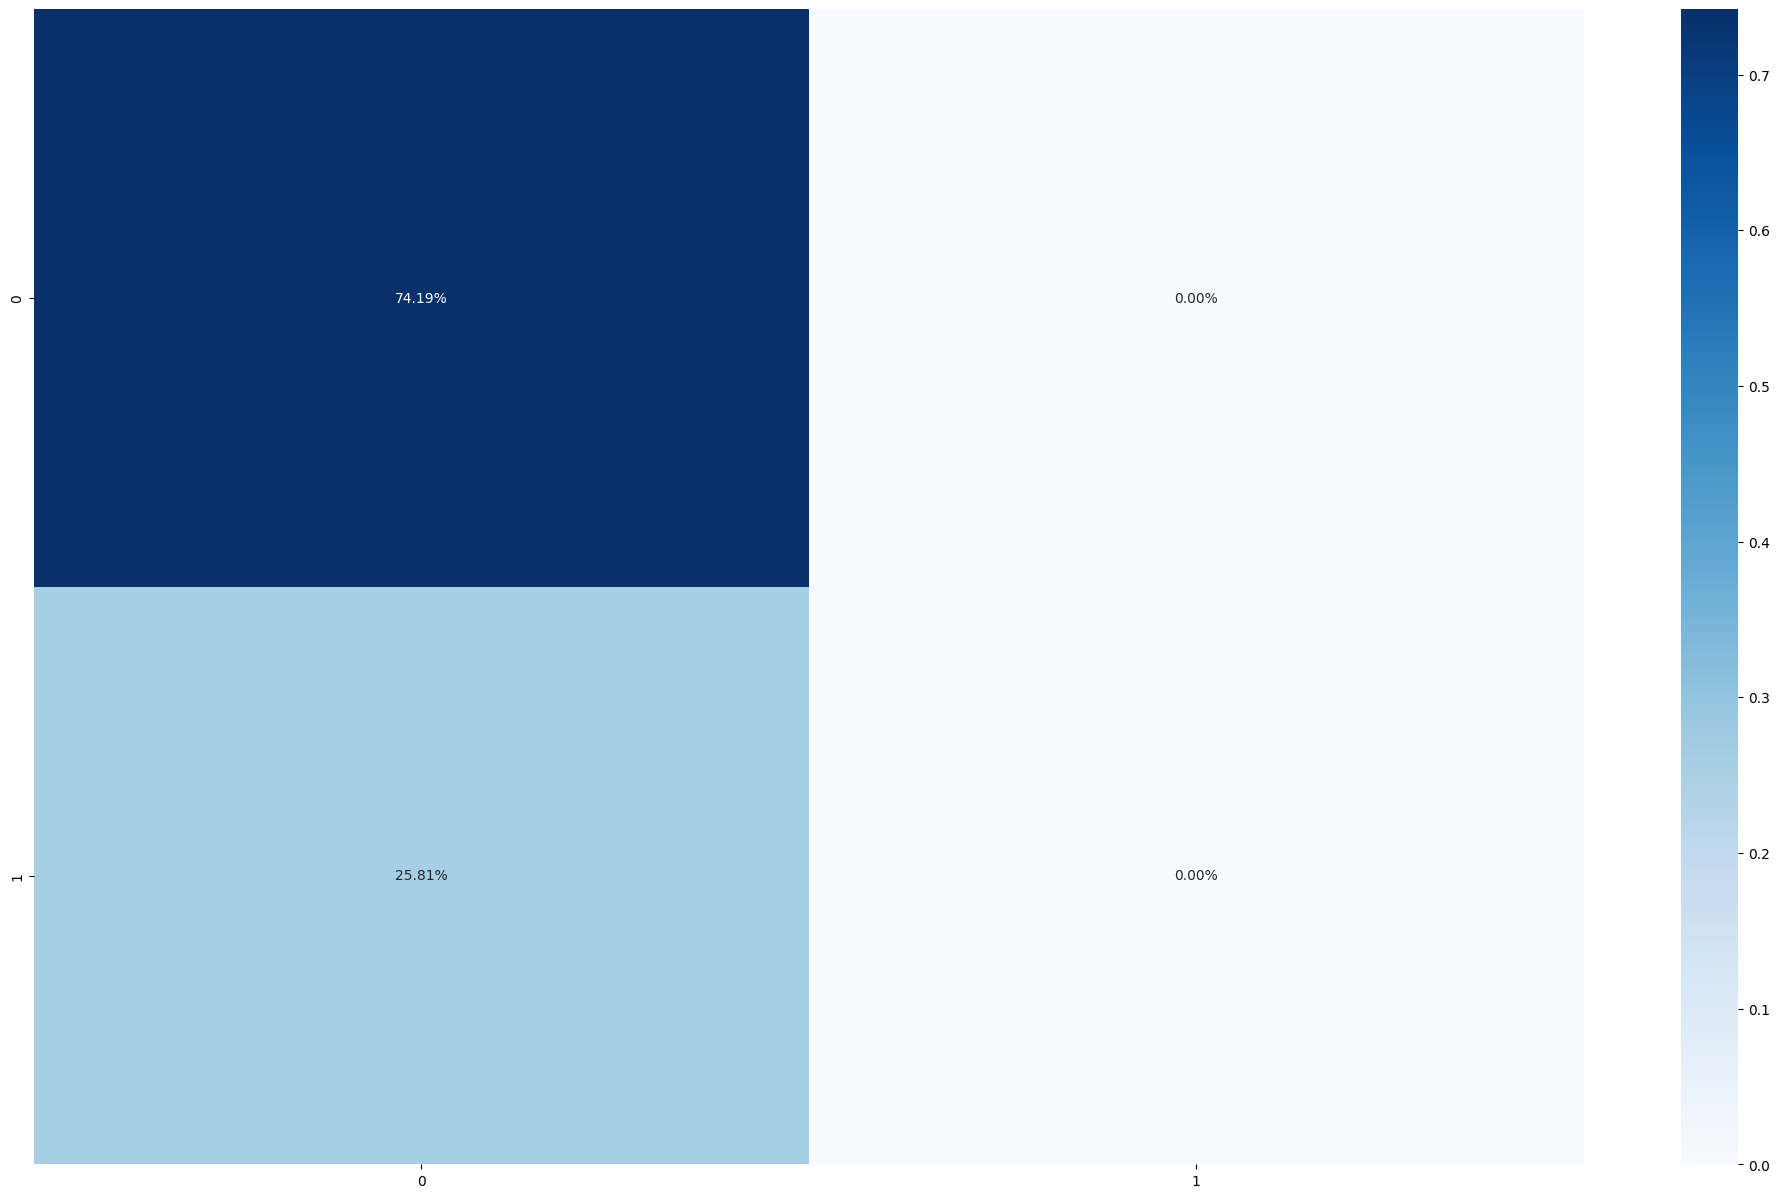

In [10]:
print(len(X_train), len(X_train[0]))
print(len(Y_train))
y_pred = machine.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(25, 15))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')